# MATH 210 Introduction to Mathematical Computing

## February 29, 2016

Today's Agenda:

1. Approximating Solution of ODEs using `scipy.integrate.odeint`
2. Build our own ODE solver using Euler's method
3. Exercises

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.integrate as spi

## 1. Using `scipy.integrate.odeint`

Let's look at the documentation for `odeint` to remember how to use it:

In [2]:
spi.odeint?

Given a first order ODE $y' = f(y,t)$ with $y(t_0) = y_0$, we can use `odeint` to approximate a solution and the documentation indicates that we need to input a function `f` (which defines the right side of the ODE), initial condition `y0` and array of $t$ values `t` where $t[0]$ is the initial $t$ value $t_0$.

For example, let's plot an approximation of $y' = \sin(y)$ for $y(0) = 1$ over the interval $t \in [0,5]$.

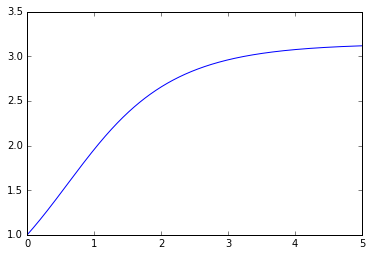

In [3]:
def f(y,t):
    return np.sin(y)

y0 = 1
t = np.linspace(0,5,1000)

y = spi.odeint(f,y0,t)

plt.plot(t,y)
plt.show()

**Example.** Let's plot an approximation of $y' = \sin(y)$ for $y(1) = 3$ over the interval $t \in [0,5]$. Notice that we're trying to plot a solution over an interval where the left endpoint does not coincide with the intitial condition therefore we need to splice together two approximations.

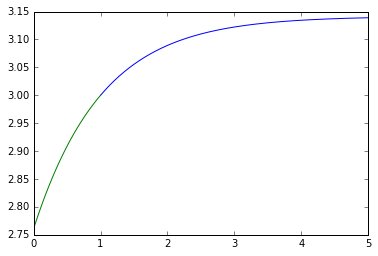

In [4]:
def f(y,t):
    return np.sin(y)

y0 = 3

# Find approximation for interval [1,5]
t = np.linspace(1,5,1000)
y = spi.odeint(f,y0,t)

# Find approximation for interval [0,1] by "going backwards"
t1 = np.linspace(1,0,100)
y1 = spi.odeint(f,3,t1)

# Plot both approximations in the same figure
plt.plot(t,y,t1,y1)
plt.show()

## 2. Euler's Method

Consider the first order ODE $y' = f(y,t)$ with $y(t_0) = y_0$. The ODE tells us exactly what the derivative of $y(t)$ is at every point but we just don't know what $y(t)$ is. Euler's method uses the tangent line to approximate the value $y(t_1)$ at a $t$ value near $t_0$ using the tangent line at $t=t_0$. In particular, let $y_1$ be the value on the tangent line at $t=t_1$ and so

$$
y'(t_0) \approx \frac{y_1 - y_0}{t_1 - t_0} \ \ \Longrightarrow \ \ y_1 \approx y_0 + f(y_0,t_0)(t_1 - t_0) 
$$

Let's put ODEs aside for a moment and simply plot the curve $y = t^2$ and the tangent line $y=1+2t$ to the curve at $y=1$.

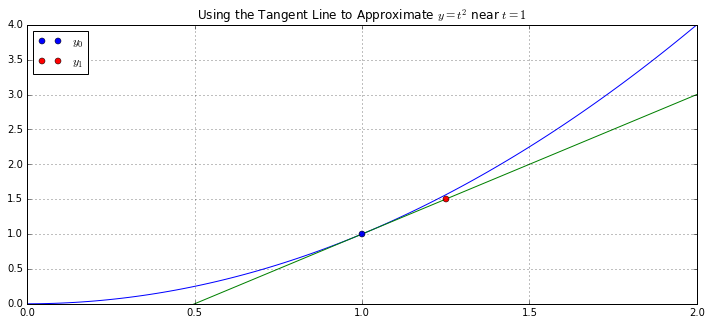

In [5]:
a = 0
b = 2

t = np.linspace(a,b,100)
y = t**2

plt.figure(figsize=(12,5))
plt.plot(t,y)
plt.xlim([a,b]), plt.ylim([0,4]), plt.grid('on')

y_tangent = 1 + 2*(t-1)
plt.plot(t,y_tangent)

t0 = 1
t1 = 1.25
y0 = t0**2
y1 = y0 + 2*(t1-t0)

plt.plot(t0,y0,'bo',label='$y_0$')
plt.plot(t1,y1,'ro',label='$y_1$')
plt.title('Using the Tangent Line to Approximate $y = t^2$ near $t=1$')
plt.legend(loc='best')

plt.show()

**Euler's method** repeats this process: given a point $(t_k,y_k)$, use the ODE $y' = f(y,t)$ to compute the slope $f(y_k,t_k)$ and then compute the next approximation by the recursive formula

$$
y_{k+1} = y_k + f(y_k,t_k) (t_{k+1} - t_k)
$$

In other words, let $t_0, t_1, t_2, \dots, t_k, \dots$ be a sequence of $t$ values. Euler's method is the sequence $y_0,y_1,y_2,\dots,y_k, \dots$ of approximations of the true values $y(t_k)$ which are calculated by the formula above. If all the $t$ values are evenly spaced, we call the difference $h = t_{k+1} - t_k$ the **timestep**.

Let's implement Euler's method. Write a function called `euler` which takes a function `f`, an initial condition `y0` and array `t` (just like `scipy.integrate.odeint`) and returns the array `y` of approximate values given by Euler's method.

In [6]:
def euler(func,y0,t):
    "Approximate the solution of y'=func(y,t) with y(t[0])=y0 using Euler's method."
    
    # Get the length of t
    n = len(t)
    
    # Initialize the array of y values with y[0] equal to initial condition
    y = np.zeros(n)
    y[0] = y0
    
    # Compute the array of y values according to Euler's method
    for k in range(0,n-1):
        y[k+1] = y[k] + func(y[k],t[k]) * (t[k+1] - t[k])
    
    # Return the array of y values
    return y

To test our function, let's use it to approximate a solution of $y' = y$ for $y(0)=1$ (with timestep $h = 0.01$) and compare it to the true solution $y(t)=e^t$.

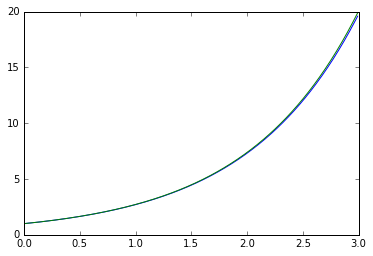

In [7]:
def f(y,t):
    return y

y0 = 1
t = np.arange(0,3,0.01)
# Approximation by Euler's method
y = euler(f,y0,t)
# True solution
y1 = np.exp(t)
plt.plot(t,y,t,y1)
plt.show()

A very important observation about Euler's method is the following: **increasing the number of points in the given interval (equivalently, reducing the size of the timestep $h = t_{k+1} - t_k$) increases the accuracy but decreases the speed of Euler's method**.

## 3. Exercises

**Exercise.** For each initial value problem below, plot the approximation given by `odeint` together with the solution provided by `euler` in the same figure. Use an array `t` of evenly spaced $t$ values with the specified timestep $h$.

(a) $y' = y^2 + t^2$ with $y(0)=-5$ for $t \in [0,2]$ with timestep (i) $h = 0.1$ (ii) $h = 0.01$ (iii) $h = 0.001$

(b) $y' = \displaystyle \frac{y}{t^2+1}$ with $y(0)=2$ for $t \in [-10,10]$ with timestep (i) $h = 0.1$ (ii) $h = 0.01$ (iii) $h = 0.001$

(c) $y' = y - t^2$ with $y(0)=1$ for $t \in [0,3]$ with timestep (i) $h = 0.1$ (ii) $h = 0.01$ (iii) $h = 0.001$


**Exercise.** Use `odeint` and `euler` to plot approximations of the logistic equation $y' = y(1-y)$ for $t \in [0,5]$ (and time step $h = 0.01$) for:

(a) $y(0) = 0$

(b) $y(0) = 0.5$

(c) $y(0) = 1$

(d) $y(0) = 2$

(e) $y(0) = 5$